# Redes neuronales convolucionales con TensorFlow

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Matemáticas, Analisis de datos y Python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img title="Redes neuronales convolucionales con TensorFlow" alt="Redes neuronales convolucionales con TensorFlow" src="http://relopezbriega.github.io/images/convNetTensorFlow.jpg" high="400px" width="600px">

## Introducción

De más esta decir que el sentido de la [visión](https://es.wikipedia.org/wiki/Visi%C3%B3n) es uno de los grandes prodigios de la Naturaleza. En fracciones de segundos, podemos identificar objetos dentro de nuestro campo de visión, sin siquiera detenernos a pensar en ello. Pero no sólo podemos nombrar estos objetos que observamos, sino que también podemos percibir su profundidad, distinguir perfectamente sus contornos, y separarlos de sus fondos.
De alguna manera los ojos captan datos de [píxeles](https://es.wikipedia.org/wiki/P%C3%ADxel), pero el cerebro transforma esa información en características más significativas - *líneas, curvas y formas* - que podrían indicar, por ejemplo, que estamos mirando a una persona.

Gracias a que el área del cerebro responsable de la [visión](https://es.wikipedia.org/wiki/Visi%C3%B3n) es una de las zonas más estudiadas y que más conocemos; sabemos que la [corteza visual](https://es.wikipedia.org/wiki/Corteza_visual) contiene una disposición jerárquica compleja de [neuronas](https://es.wikipedia.org/wiki/Neurona).  Por ejemplo, la información visual es introducida en la corteza a través del área visual primaria, llamada V1. Las [neuronas](https://es.wikipedia.org/wiki/Neurona) de V1 se ocupan de características visuales de bajo nivel, tales como pequeños segmentos de contorno, componentes de pequeña escala del movimiento, [disparidad binocular](https://es.wikipedia.org/wiki/Disparidad_binocular), e información básica de contraste y color. V1 luego alimenta de información a otras áreas, como V2, V4 y V5. Cada una de estas áreas se ocupa de los aspectos más específicos o abstractas de la información. Por ejemplo, las [neuronas](https://es.wikipedia.org/wiki/Neurona) en V4 se ocupan de objetos de mediana complejidad, tales como formas de estrellas en diferentes colores. La [corteza visual](https://es.wikipedia.org/wiki/Corteza_visual) de los animales es el más potente sistema de procesamiento visual que conocemos, por lo que suena lógico inspirarse en ella para crear una variante de [redes neuronales artificiales](https://es.wikipedia.org/wiki/Red_neuronal_artificial) que ayude a identificar imágenes; es así como surgen las [redes neuronales convolucionales](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales).

## ¿Qué son las Redes Neuronales Convolucionales?

Las [redes neuronales convolucionales](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales) son muy similares a las [redes neuronales](https://es.wikipedia.org/wiki/Red_neuronal_artificial) ordinarias como el [perceptron multicapa](https://es.wikipedia.org/wiki/Perceptr%C3%B3n_multicapa) que vimos en el [artículo anterior](http://relopezbriega.github.io/blog/2016/06/05/tensorflow-y-redes-neuronales/); se componen de [neuronas](https://es.wikipedia.org/wiki/Neurona) que tienen *pesos* y *sesgos* que pueden aprender. Cada [neurona](https://es.wikipedia.org/wiki/Neurona) recibe algunas entradas, realiza un [producto escalar](https://es.wikipedia.org/wiki/Producto_escalar) y luego aplica una función de activación. Al igual que en el [perceptron multicapa](https://es.wikipedia.org/wiki/Perceptr%C3%B3n_multicapa) también vamos a tener una *función de pérdida o costo* (por ejemplo SVM / Softmax) sobre la última capa, la cual estará totalmente conectada. Lo que diferencia a las [redes neuronales convolucionales](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales) es que suponen explícitamente que las entradas son imágenes, lo que nos permite codificar ciertas propiedades en la arquitectura; permitiendo ganar en eficiencia y reducir la cantidad de parámetros en la red. Las [redes neuronales convolucionales](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales) vienen a solucionar el problema de que las [redes neuronales](https://es.wikipedia.org/wiki/Red_neuronal_artificial) ordinarias no escalan bien para imágenes de mucha definición; por ejemplo en el problema de [MNIST](http://relopezbriega.github.io/blog/2016/06/05/tensorflow-y-redes-neuronales/), las imágenes son de 28x28; por lo que una sola [neurona](https://es.wikipedia.org/wiki/Neurona) plenamente conectado en una primera capa oculta de una [red neuronal](https://es.wikipedia.org/wiki/Red_neuronal_artificial) ordinaria tendría 28 x 28  = 784 pesos. Esta cantidad todavía parece manejable, pero es evidente que esta estructura totalmente conectado no funciona bien con imágenes más grandes. Si tomamos el caso de una imagen de mayor tamaño, por ejemplo de 200x200 con colores RGB, daría lugar a [neuronas](https://es.wikipedia.org/wiki/Neurona) que tienen 200 x 200 x 3  = 120.000 pesos. Por otra parte, el contar con tantos parámetros, también sería un desperdicio de recursos y conduciría rápidamente a [sobreajuste](http://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste/).

Las [redes neuronales convolucionales](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales) trabajan modelando de forma consecutiva pequeñas piezas de información, y luego combinando esta información en las capas más profundas de la red. Una manera de entenderlas es que la primera capa intentará detectar los bordes y establecer patrones de detección de bordes. Luego, las capas posteriores trataran de combinarlos en formas más simples y, finalmente, en patrones de las diferentes posiciones de los objetos, iluminación, escalas, etc. Las capas finales intentarán hacer coincidir una imagen de entrada con todas los patrones y arribar a una predicción final como una suma ponderada de todos ellos. De esta forma las [redes neuronales convolucionales](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales) son capaces de modelar complejas variaciones y comportamientos dando predicciones bastantes precisas.

## Estructura de las Redes Neuronales Convolucionales

En general, las [redes neuronales convolucionales](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales) van a estar construidas con una estructura que contendrá 3 tipos distintos de capas:

1. Una capa convolucional, que es la que le da le nombre a la red.
2. Una capa de reducción o de *pooling*, la cual va a reducir la cantidad de parámetros al quedarse con las características más comunes.
3. Una capa clasificadora totalmente conectada, la cual nos va dar el resultado final de la red.

Profundicemos un poco en cada una de ellas.

### Capa convolucional

Como dijimos anteriormente, lo que distingue a las [redes neuronales convolucionales](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales) de cualquier otra [red neuronal](https://es.wikipedia.org/wiki/Red_neuronal_artificial) es utilizan un operación llamada [convolución](https://es.wikipedia.org/wiki/Convoluci%C3%B3n) en alguna de sus capas; en lugar de utilizar la multiplicación de matrices que se aplica generalmente.
La operación de [convolución](https://es.wikipedia.org/wiki/Convoluci%C3%B3n) recibe como *entrada o input* la imagen y luego aplica sobre ella un *filtro o kernel* que nos devuelve un *mapa de las características* de la imagen original, de esta forma logramos reducir el tamaño de los parámetros.
La [convolución](https://es.wikipedia.org/wiki/Convoluci%C3%B3n) aprovecha tres ideas importantes que pueden ayudar a mejorar cualquier sistema de [machine learning](https://es.wikipedia.org/wiki/Aprendizaje_autom%C3%A1tico), ellas son: 
* **interacciones dispersas**, ya que al aplicar un filtro de menor tamaño sobre la entrada original podemos reducir drásticamente la cantidad de parámetros y cálculos;
* los **parámetros compartidos**, que hace referencia a compartir los parámetros entre los distintos tipos de filtros, ayudando también a mejorar la eficiencia del sistema; y
* las **representaciones equivariante**, que indican que si las entradas cambian, las salidas van a cambiar también en forma similar. 

Por otra parte, la [convolución](https://es.wikipedia.org/wiki/Convoluci%C3%B3n) proporciona un medio para trabajar con entradas de tamaño variable, lo que puede ser también muy conveniente.

<img alt="Convolución" title="Convolución" src="http://relopezbriega.github.io/images/conv_layer.png">


### Capa de reducción o pooling

La capa de reducción o *pooling* se coloca generalmente después de la capa *convolucional*. Su utilidad principal radica en la reducción de las dimensiones espaciales (ancho x alto) del volumen de entrada para la siguiente capa *convolucional*. No afecta a la dimensión de profundidad del volumen.
La operación realizada por esta capa también se llama *reducción de muestreo*, ya que la reducción de tamaño conduce también a la pérdida de información. Sin embargo, una pérdida de este tipo puede ser beneficioso para la red por dos razones:

* la disminución en el tamaño conduce a una menor sobrecarga de cálculo para las próximas capas de la red;
* también trabaja para reducir el [sobreajuste](http://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste/).

La operación que se suele utilizar en esta capa es *max-pooling*, que divide a la imagen de entrada en un conjunto de rectángulos y, respecto de cada subregión, se va quedando con el máximo valor.

<img alt="max pooling" title="max pooling" src="http://relopezbriega.github.io/images/Max_pooling.png">


### Capa clasificadora totalmente conectada

Al final de las capas *convolucional* y de *pooling*, las redes utilizan generalmente capas completamente conectados en la que cada pixel se considera como una [neurona](https://es.wikipedia.org/wiki/Neurona) separada al igual que en una [red neuronal](https://es.wikipedia.org/wiki/Red_neuronal_artificial) regular. Esta última capa clasificadora tendrá tantas [neuronas](https://es.wikipedia.org/wiki/Neurona) como el número de clases que se debe predecir.

## Ejemplo con TensorFlow y el dataset CIFAR-10

Luego de toda esta introducción teórica es tiempo de pasar a la acción y ver como podemos aplicar todo lo que hemos aprendimos para crear una [red neuronal convolucional](https://es.wikipedia.org/wiki/Redes_neuronales_convolucionales) con la ayuda de [TensorFlow](https://www.tensorflow.org/). En este ejemplo vamos a intentar clasificar imágenes en 10 categorías distintas; la idea es entrenar la red para que pueda distinguir entre imágenes de aviones, automóviles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones. Para esto vamos a utilizar el conjunto de datos [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html).

### El conjunto de datos CIFAR-10 

El conjunto de datos [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) consta de 60.000 imágenes a color de 32x32 que están divididas en 10 clases distintas; con 6.000 imágenes por cada clase. Tiene 50.000 imágenes de entrenamiento y 10.000 imágenes de prueba.
[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) se divide en cinco lotes de entrenamiento y un lote de prueba, cada uno con 10.000 imágenes. El lote de prueba contiene exactamente 1.000 imágenes seleccionadas al azar de cada clase. Los lotes de entrenamiento contienen las imágenes restantes en orden aleatorio, pero algunos lotes de entrenamiento pueden tener más imágenes de una clase que otro. Entre todos ellos, los lotes de entrenamiento contienen exactamente 5.000 imágenes de cada clase. Las clases son completamente mutuamente excluyentes. No existe solapamiento entre automóviles y camiones.

### Explorando CIFAR-10

Antes de pasar al armado de la red, exploremos un poco este [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos).

In [1]:
# <!-- collapse=True -->
# importamos la libreria
import tensorflow as tf
from tensorflow.python import control_flow_ops
import time, os
import cifar10_input
cifar10_input.maybe_download_and_extract()

# importamos librerías adicionales
import numpy as np
import matplotlib.pyplot as plt
import cPickle

%matplotlib inline

# funciones de ayuda
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    data = dict['data']
    imgs = np.transpose(np.reshape(data,(-1,32,32,3), order='F'),
                        axes=(0,2,1,3)) #order batch,x,y,color
    y = np.asarray(dict['labels'], dtype='uint8')
    return y, imgs

clases = ['avion','auto','pajaro','gato','ciervo',
          'perro','rana','caballo','barco','camion']

In [2]:
# cargar los datos
labels, data = unpickle('cifar-10-batches-py/test_batch')

In [3]:
# forma del dataset
print 'forma dataset prueba: {}'.format(data.shape)

forma dataset prueba: (10000, 32, 32, 3)


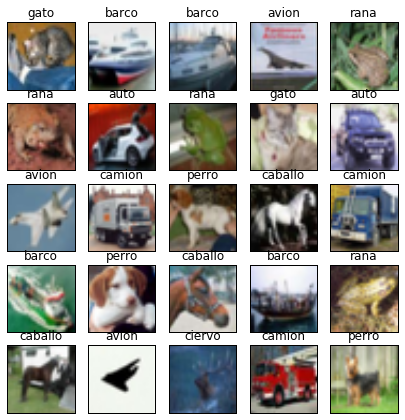

In [4]:
# dibujar imagenes
fig = plt.figure(figsize=(7,7))
for i in range(25):
    fig.add_subplot(5,5,(i+1),xticks=[], yticks=[])
    plt.title("{}".format(clases[labels[i]]))
    plt.imshow(data[i])
plt.savefig('cifar.jpg')

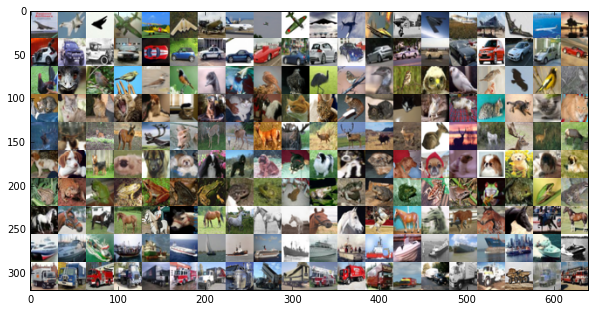

In [5]:
# dibujar 200 imagenes
conj = np.zeros((320,640,3),dtype='uint8')
for i in range(10):
    idx = np.where(labels == i)[0]
    for j in range(20):
        conj[32*i:32*(i+1),32*j:32*(j+1),:] = data[idx[j]]

fig = plt.figure(figsize=(10,20))
imgs = plt.imshow(conj)

Como podemos ver, contamos con 5 lotes de entrenamientos de 10.000 imágenes cada uno; cada imagen esta representa por un [tensor](https://es.wikipedia.org/wiki/C%C3%A1lculo_tensorial) de forma 32x32x3; siendo 32x32 el largo y ancho de la imagen y la profundidad de 3 se la da los valores de los colores [RGB](https://es.wikipedia.org/wiki/RGB). También podemos ver que las imágenes de cada clase son bastante variadas y en distintas posiciones, por lo que la red deberá aprender las características fundamentas de cada una de ellas para poder clasificarlas correctamente.

### Construyendo la red neuronal convolucional

Ahora que ya conocemos el [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) con el que vamos a trabajar, es tiempo de pasar al armado del modelo. Enseñemos a la computadora a ver!

In [6]:
# armado de la red

# Parametros
learning_rate = 0.01
training_epochs = 15
batch_size = 128
display_step = 500
NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN = 50000

def inputs(eval_data=True):
    data_dir = os.path.join('data/cifar10_data', 'cifar-10-batches-bin')
    return cifar10_input.inputs(eval_data=eval_data, data_dir=data_dir,
                              batch_size=batch_size)

def distorted_inputs():
    data_dir = os.path.join('data/cifar10_data', 'cifar-10-batches-bin')
    return cifar10_input.distorted_inputs(data_dir=data_dir,
                                        batch_size=batch_size)

def filter_summary(V, weight_shape):
    ix = weight_shape[0]
    iy = weight_shape[1]
    cx, cy = 8, 8
    V_T = tf.transpose(V, (3, 0, 1, 2))
    tf.image_summary("filters", V_T, max_images=64) 

def max_pool(input, k=2):
    return tf.nn.max_pool(input, ksize=[1, k, k, 1],
                          strides=[1, k, k, 1], padding='SAME')

def loss(output, y):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(output, 
                                                    tf.cast(y, tf.int64))    
    loss = tf.reduce_mean(xentropy)
    return loss

def conv_batch_norm(x, n_out, phase_train):
    beta_init = tf.constant_initializer(value=0.0, dtype=tf.float32)
    gamma_init = tf.constant_initializer(value=1.0, dtype=tf.float32)

    beta = tf.get_variable("beta", [n_out], initializer=beta_init)
    gamma = tf.get_variable("gamma", [n_out], initializer=gamma_init)

    batch_mean, batch_var = tf.nn.moments(x, [0,1,2], name='moments')
    ema = tf.train.ExponentialMovingAverage(decay=0.9)
    ema_apply_op = ema.apply([batch_mean, batch_var])
    ema_mean, ema_var = ema.average(batch_mean), ema.average(batch_var)
    def mean_var_with_update():
        with tf.control_dependencies([ema_apply_op]):
            return tf.identity(batch_mean), tf.identity(batch_var)
    mean, var = control_flow_ops.cond(phase_train,
        mean_var_with_update,
        lambda: (ema_mean, ema_var))

    normed = tf.nn.batch_norm_with_global_normalization(x, mean, var,
        beta, gamma, 1e-3, True)
    return normed

def layer_batch_norm(x, n_out, phase_train):
    beta_init = tf.constant_initializer(value=0.0, dtype=tf.float32)
    gamma_init = tf.constant_initializer(value=1.0, dtype=tf.float32)

    beta = tf.get_variable("beta", [n_out], initializer=beta_init)
    gamma = tf.get_variable("gamma", [n_out], initializer=gamma_init)

    batch_mean, batch_var = tf.nn.moments(x, [0], name='moments')
    ema = tf.train.ExponentialMovingAverage(decay=0.9)
    ema_apply_op = ema.apply([batch_mean, batch_var])
    ema_mean, ema_var = ema.average(batch_mean), ema.average(batch_var)
    def mean_var_with_update():
        with tf.control_dependencies([ema_apply_op]):
            return tf.identity(batch_mean), tf.identity(batch_var)
    mean, var = control_flow_ops.cond(phase_train,
        mean_var_with_update,
        lambda: (ema_mean, ema_var))

    reshaped_x = tf.reshape(x, [-1, 1, 1, n_out])
    normed = tf.nn.batch_norm_with_global_normalization(reshaped_x, mean, var,
        beta, gamma, 1e-3, True)
    return tf.reshape(normed, [-1, n_out])
    
def conv2d(input, weight_shape, bias_shape, phase_train, visualize=False):
    incoming = weight_shape[0] * weight_shape[1] * weight_shape[2]
    weight_init = tf.random_normal_initializer(stddev=(2.0/incoming)**0.5)
    W = tf.get_variable("W", weight_shape, initializer=weight_init)
    if visualize:
        filter_summary(W, weight_shape)
    bias_init = tf.constant_initializer(value=0)
    b = tf.get_variable("b", bias_shape, initializer=bias_init)
    logits = tf.nn.bias_add(tf.nn.conv2d(input, W,
                        strides=[1, 1, 1, 1], padding='SAME'), b)
    return tf.nn.relu(conv_batch_norm(logits, weight_shape[3],
                                      phase_train))

def layer(input, weight_shape, bias_shape, phase_train):
    weight_init = tf.random_normal_initializer(stddev=
                                               (2.0/weight_shape[0])**0.5)
    bias_init = tf.constant_initializer(value=0)
    W = tf.get_variable("W", weight_shape,
                        initializer=weight_init)
    b = tf.get_variable("b", bias_shape,
                        initializer=bias_init)
    logits = tf.matmul(input, W) + b
    return tf.nn.relu(layer_batch_norm(logits, weight_shape[1],
                                       phase_train))

def inference(x, keep_prob, phase_train):
    
    with tf.variable_scope("conv_1"):
        conv_1 = conv2d(x, [5, 5, 3, 64], [64], phase_train, visualize=True)
        pool_1 = max_pool(conv_1)
        
    with tf.variable_scope("conv_2"):
        conv_2 = conv2d(pool_1, [5, 5, 64, 64], [64], phase_train)
        pool_2 = max_pool(conv_2)
        
    with tf.variable_scope("fc_1"):
        dim = 1
        for d in pool_2.get_shape()[1:].as_list():
            dim *= d
        pool_2_flat = tf.reshape(pool_2, [-1, dim])
        fc_1 = layer(pool_2_flat, [dim, 384], [384], phase_train)
        # apply dropout
        fc_1_drop = tf.nn.dropout(fc_1, keep_prob)
        
    with tf.variable_scope("fc_2"):
        fc_2 = layer(fc_1_drop, [384, 192], [192], phase_train)
        # apply dropout
        fc_2_drop = tf.nn.dropout(fc_2, keep_prob)
        
    with tf.variable_scope("output"):
        output = layer(fc_2_drop, [192, 10], [10], phase_train)
    
    return output

def evaluate(output, y):
    correct_prediction = tf.equal(tf.cast(tf.argmax(output, 1), 
                                          dtype=tf.int32), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.scalar_summary("validation error", (1.0 - accuracy))
    return accuracy

def training(cost, global_step):
    tf.scalar_summary("cost", cost)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)
    return train_op

En este bloque de código comenzamos definiendo los parámetros del modelo y algunas funciones de ayuda.
Las funciones `inputs` y `distorted_inputs` las vamos a utilizar para cargar los datos de entrada y reducir su tamaño a 24x24 para no sobrecargar al equipo.
La función `filter_summary` nos va a ayudar a visualizar la evolución de los filtros de las capas *convolucionales*. 
La función `max_pool` es la que vamos a utilizar para las capas de *pooling*.
La función `loss` es la que va a medir la *perdida o costo* del modelo en cada iteración para luego poder ir optimizando. 
Las funciones `evaluate` y `training` son las que vamos a utilizar para evaluar y entrenar el modelo.
La función `conv2d` nos va a permitir crear la capa *convolucional* con una forma particular.
La función `layer` nos va a ayudar a construir cada capa.
Las funciones `conv_batch_norm` y `layer_batch_norm` nos van a ayudar a *normalizar* cada uno de los lotes con los que vamos a nutrir a la red.
Por último, la función `inference` es la que va a tener la estructura general del modelo y terminar realizando las predicciones.

Ahora solo resta lanzar y entrenar el modelo.

In [7]:
# Lanzando el modelo
with tf.Graph().as_default():
    with tf.variable_scope("cifar_Conv_model"):
        x = tf.placeholder("float", [None, 24, 24, 3])
        y = tf.placeholder("int32", [None])
        keep_prob = tf.placeholder(tf.float32) # dropout probability
        phase_train = tf.placeholder(tf.bool) # training or testing

        distorted_images, distorted_labels = distorted_inputs()
        val_images, val_labels = inputs()

        output = inference(x, keep_prob, phase_train)

        cost = loss(output, y)

        global_step = tf.Variable(0, name='global_step', trainable=False)

        train_op = training(cost, global_step)

        eval_op = evaluate(output, y)

        summary_op = tf.merge_all_summaries()

        saver = tf.train.Saver()

        sess = tf.Session()

        summary_writer = tf.train.SummaryWriter("conv_cifar_bn_logs/",
                                                graph=sess.graph)

              
        init_op = tf.initialize_all_variables()

        sess.run(init_op)

        tf.train.start_queue_runners(sess=sess)

        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN/batch_size)
            # Loop over all batches
            for i in range(total_batch):
                # Fit training using batch data
                train_x, train_y = sess.run([distorted_images, distorted_labels])
                
                _, new_cost = sess.run([train_op, cost], 
                                       feed_dict={x: train_x, 
                                                  y: train_y,
                                                  keep_prob: 1,
                                                  phase_train: True})
                # Compute average loss
                avg_cost += new_cost/total_batch
                #print "Epoch %d, minibatch %d of %d. Cost = %0.4f." %(epoch, 
                 #                                   i, total_batch, new_cost)
                    
            # Display logs per epoch step
            if epoch % display_step == 0:
                print "Epoch:", '%04d' % (epoch+1), "cost =", "{:.9f}".format(avg_cost)
                
                val_x, val_y = sess.run([val_images, val_labels])
                
                accuracy = sess.run(eval_op, feed_dict={x: val_x, 
                                                        y: val_y, 
                                                        keep_prob: 1,
                                                        phase_train: False})
                
                print "Validation Error:", (1 - accuracy)
                
                summary_str = sess.run(summary_op, feed_dict={x: train_x,
                                                              y: train_y,
                                                              keep_prob: 1,
                                                              phase_train: False})
                summary_writer.add_summary(summary_str, sess.run(global_step))
                
                saver.save(sess, "conv_cifar_bn_logs/model-checkpoint",
                           global_step=global_step)

        print "Optimization Finished!"
        # validation first 256 imgs
        val_x, val_y = sess.run([val_images, val_labels])
        accuracy = sess.run(eval_op, feed_dict={x: val_x[:256], 
                                                y: val_y[:256], 
                                                keep_prob: 1, 
                                                phase_train: False})

        print "Test Accuracy:", accuracy

Filling queue with 20000 CIFAR images before starting to train. This will take a few minutes.
Epoch: 0001 cost = 1.528662126
Validation Error: 0.3984375
Optimization Finished!
Test Accuracy: 0.820312


Como podemos ver, logramos una precisión del 82% entrenando a la red en tan solo 15 épocas, una precisión bastante alta, dada la complejidad del problema y tan poco entrenamiento.

Aquí termina el artículo, espero que les haya resultado interesante y los motive a explorar el fascinante mundo de las [redes neuronales](https://es.wikipedia.org/wiki/Red_neuronal_artificial).

Saludos!

*Este post fue escrito utilizando IPython notebook. Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/ConvTensorFlow.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/ConvTensorFlow.ipynb).*